In [7]:
#from yahooquery import Ticker
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Import/Data Yahoo

In [ ]:
# aapl = Ticker('aapl')

# aapl.summary_detail

# df = Ticker('aapl').history(period='20y', interval='1d')

# df.plot()

# aapl.all_modules

# Import API ALpha

https://www.alphavantage.co/documentation/

## Contrôle de la data

Récolte de la data en CSV, Check s'il y a des valeurs nulles ou doubles.

In [ ]:
url = 'https://www.alphavantage.co/query?function=REAL_GDP&interval=quarterly&apikey=1BKEZCMKUSE99CKJ&datatype=csv'
r = requests.get(url)
data_real_gdp = pd.read_csv(url)

data_real_gdp.to_csv(f'data_real_gdp.csv')

In [ ]:
data_real_gdp.isnull().sum()
data.duplicated().sum()

In [ ]:
url = 'https://www.alphavantage.co/query?function=REAL_GDP_PER_CAPITA&apikey=1BKEZCMKUSE99CKJ&datatype=csv'
#r = requests.get(url)
data_real_gdp_capita = pd.read_csv(url)

len(data_real_gdp_capita)

data_real_gdp_capita.to_csv(f'data_real_gdp_capita.csv')

In [ ]:
data_real_gdp_capita.isnull().sum()
data.duplicated().sum()

In [ ]:
url = 'https://www.alphavantage.co/query?function=FEDERAL_FUNDS_RATE&interval=daily&apikey=1BKEZCMKUSE99CKJ&datatype=csv'
#r = requests.get(url)
data_federal_funds = pd.read_csv(url)

len(data_federal_funds)

In [ ]:
data_federal_funds.isnull().sum()
data_federal_funds.duplicated().sum()
data_federal_funds.to_csv(f'data_federal_funds.csv')

In [ ]:
url = 'https://www.alphavantage.co/query?function=CONSUMER_SENTIMENT&apikey=1BKEZCMKUSE99CKJ&datatype=csv'
#r = requests.get(url)
data_consumer_sentiment = pd.read_csv(url)

len(data_consumer_sentiment)

In [ ]:
data_consumer_sentiment.duplicated().sum()
data_consumer_sentiment.isnull().sum()
data_consumer_sentiment.to_csv(f'data_consumer_sentiment.csv')

In [ ]:
url = 'https://www.alphavantage.co/query?function=RETAIL_SALES&apikey=1BKEZCMKUSE99CKJ&datatype=csv'
#r = requests.get(url)
data_retails = pd.read_csv(url)

len(data_retails)

In [ ]:
data_retails.duplicated().sum()
data_retails.isnull().sum()
data_retails.to_csv(f'data_retails.csv')

In [ ]:
url = 'https://www.alphavantage.co/query?function=DURABLES&apikey=1BKEZCMKUSE99CKJ&datatype=csv'
#r = requests.get(url)
data_durable = pd.read_csv(url)

data_durable

In [ ]:
data_durable.duplicated().sum()
data_durable.isnull().sum()
data_durable.to_csv(f'data_durable.csv')

## Treasury yield

In [ ]:
url = 'https://www.alphavantage.co/query?function=TREASURY_YIELD&interval=daily&maturity=10year&apikey=1BKEZCMKUSE99CKJ&datatype=csv'
#r = requests.get(url)
data_treasury_yield_10 = pd.read_csv(url)

data_treasury_yield_10 = data_treasury_yield_10[data_treasury_yield_10['timestamp']>'2000']
data_treasury_yield_10

In [ ]:
url = 'https://www.alphavantage.co/query?function=TREASURY_YIELD&interval=daily&maturity=2year&apikey=1BKEZCMKUSE99CKJ&datatype=csv'
#r = requests.get(url)
data_treasury_yield_2 = pd.read_csv(url)
#data_treasury_yield_2.dtypes
data_treasury_yield_2 = data_treasury_yield_2[data_treasury_yield_2['timestamp']>'2000']
data_treasury_yield_2

In [ ]:
treasury_yield = data_treasury_yield_10.merge(data_treasury_yield_2, on = 'timestamp')
treasury_yield['value_x'] = pd.to_numeric(treasury_yield['value_x'],errors='coerce')
treasury_yield['value_y'] = pd.to_numeric(treasury_yield['value_y'],errors='coerce')
treasury_yield['value'] = treasury_yield['value_x']-treasury_yield['value_y']
treasury_yield.columns = ['timestamp','value_10years','value_2years','value']
treasury_yield

treasury_yield.to_csv(f'treasury_yield.csv')

In [ ]:
data_treasury_yield.isnull().sum()
data_treasury_yield.duplicated().sum()

## Liste 500 entreprises

In [20]:
list_ent = ['AAPL',
 'MSFT',
 'GOOG',
 'AMZN', 
 'BRK.B',
 'TSLA',
 'UNH',
 'XOM',
 'JNJ',
 'WMT',
 'NVDA',
 'JPM',
 'V',
 'CVX',
 'PG',
 'LLY',
 'MA',
 'HD',
 'META',
 'BAC',
 'ABBV',
 'PFE',
 'KO',
 'MRK',
 'PEP',
 'COST',
 'ORCL',
 'AVGO',
 'TMO',
 'MCD',
 'CSCO',
 'ACN',
 'DHR',
 'TMUS',
 'ABT',
 'WFC',
 'DIS',
 'LIN',
 'NEE',
 'BMY',
 'NKE',
 'VZ',
 'TXN',
 'UPS',
 'COP',
 'ADBE',
 'CMCSA',
 'CRM',
 'PM',
 'MS',
 'AMGN',
 'SCHW',
 'HON',
 'RTX',
 'QCOM',
 'T',
 'IBM',
 'DE',
 'CVS',
 'LOW',
 'GS',
 'UNP',
 'NFLX',
 'LMT',
 'CAT',
 'AMD',
 'INTC',
 'ELV',
 'SPGI',
 'AXP',
 'SBUX',
 'INTU',
 'BLK',
 'ADP',
 'GILD',
 'PLD',
 'MDT',
 'BA',
 'AMT',
 'CI',
 'GE',
 'TJX',
 'ISRG',
 'C',
 'AMAT',
 'PYPL',
 'MDLZ',
 'CB',
 'SYK',
 'ADI',
 'MMC',
 'EOG',
 'NOW',
 'VRTX',
 'MO',
 'NOC',
 'EL',
 'REGN',
 'PGR',
 'BKNG',
 'DUK',
 'TGT',
 'SLB',
 'SO',
 'MMM',
 'ITW',
 'ZTS',
 'GD',
 'APD',
 'HUM',
 'MRNA',
 'BDX',
 'CSX',
 'WM',
 'PNC',
 'HCA',
 'ETN',
 'USB',
 'FISV',
 'SHW',
 'OXY',
 'CL',
 'MU',
 'CME',
 'AON',
 'LRCX',
 'BSX',
 'EQIX',
 'TFC',
 'PXD',
 'CHTR',
 'CCI',
 'MET',
 'ATVI',
 'ICE',
 'MPC',
 'NSC',
 'DG',
 'GM',
 'EMR',
 'F',
 'KLAC',
 'MCO',
 'FCX',
 'KDP',
 'MNST',
 'MCK',
 'VLO',
 'ORLY',
 'ADM',
 'PSX',
 'PSA',
 'SRE',
 'SNPS',
 'MAR',
 'D',
 'GIS',
 'AEP',
 'AZO',
 'KHC',
 'APH',
 'HSY',
 'CNC',
 'CTVA',
 'EW',
 'CTAS',
 'A',
 'ROP',
 'JCI',
 'CDNS',
 'FDX',
 'NXPI',
 'AIG',
 'KMB',
 'AFL',
 'HES',
 'MSI',
 'PAYX',
 'DVN',
 'TRV',
 'BIIB',
 'DXCM',
 'SYY',
 'LHX',
 'RSG',
 'ENPH',
 'ECL',
 'ADSK',
 'MCHP',
 'ANET',
 'KMI',
 'CMG',
 'FTNT',
 'AJG',
 'STZ',
 'TT',
 'WMB',
 'MSCI',
 'O',
 'IQV',
 'TEL',
 'ROST',
 'PRU',
 'EXC',
 'PH',
 'FIS',
 'SPG',
 'COF',
 'NUE',
 'XEL',
 'HLT',
 'CARR',
 'PCAR',
 'BK',
 'NEM',
 'DOW',
 'EA',
 'WBA',
 'DD',
 'ALL',
 'YUM',
 'AMP',
 'CMI',
 'ILMN',
 'BF.B',
 'TDG',
 'IDXX',
 'ED',
 'KR',
 'ABC',
 'DLTR',
 'RMD',
 'ALB',
 'HAL',
 'NDAQ',
 'LVS',
 'ODFL',
 'WELL',
 'AME',
 'CSGP',
 'OTIS',
 'MTD',
 'SBAC',
 'ON',
 'VICI',
 'DLR',
 'CEG',
 'KEYS',
 'PPG',
 'WEC',
 'CTSH',
 'ROK',
 'GWW',
 'PCG',
 'HPQ',
 'FAST',
 'DFS',
 'MTB',
 'PEG',
 'OKE',
 'DHI',
 'APTV',
 'BKR',
 'GLW',
 'LYB',
 'ES',
 'BAX',
 'STT',
 'VRSK',
 'TROW',
 'WBD',
 'AWK',
 'IT',
 'GPN',
 'HRL',
 'FANG',
 'WTW',
 'RJF',
 'GPC',
 'IFF',
 'CDW',
 'TSCO',
 'FITB',
 'ARE',
 'URI',
 'ZBH',
 'K',
 'LEN',
 'EBAY',
 'EIX',
 'CBRE',
 'EFX',
 'VMC',
 'TSN',
 'HIG',
 'FTV',
 'WY',
 'EQR',
 'AVB',
 'MKC',
 'ETR',
 'LUV',
 'ULTA',
 'AEE',
 'MLM',
 'FE',
 'PFG',
 'FRC',
 'DTE',
 'DAL',
 'HBAN',
 'IR',
 'CTRA',
 'ANSS',
 'ACGL',
 'PPL',
 'RF',
 'VRSN',
 'LH',
 'EXR',
 'PWR',
 'CF',
 'CAH',
 'CFG',
 'XYL',
 'HPE',
 'EPAM',
 'DOV',
 'WAT',
 'WRB',
 'TDY',
 'PAYC',
 'ROL',
 'NTRS',
 'MRO',
 'CNP',
 'INVH',
 'CHD',
 'AES',
 'MOH',
 'JBHT',
 'MAA',
 'BBY',
 'CLX',
 'HOLX',
 'WAB',
 'DRI',
 'EXPD',
 'STE',
 'AMCR',
 'VTR',
 'IEX',
 'CAG',
 'CMS',
 'KEY',
 'MPWR',
 'BALL',
 'J',
 'BR',
 'GRMN',
 'PKI',
 'TTWO',
 'INCY',
 'FDS',
 'MOS',
 'SEDG',
 'CINF',
 'ABMD',
 'DGX',
 'WST',
 'ATO',
 'TRGP',
 'BRO',
 'SYF',
 'FOX',
 'FOXA',
 'NTAP',
 'FMC',
 'EQT',
 'OMC',
 'SJM',
 'LYV',
 'CPB',
 'HWM',
 'CPRT',
 'AVY',
 'IRM',
 'COO',
 'ALGN',
 'SWKS',
 'EXPE',
 'RCL',
 'ETSY',
 'APA',
 'GEN',
 'TXT',
 'LDOS',
 'LKQ',
 'TER',
 'PTC',
 'TRMB',
 'AKAM',
 'NVR',
 'UAL',
 'LNT',
 'FLT',
 'KIM',
 'ZBRA',
 'TYL',
 'DPZ',
 'JKHY',
 'MGM',
 'ESS',
 'L',
 'PEAK',
 'MTCH',
 'NDSN',
 'EVRG',
 'VTRS',
 'IPG',
 'BEN',
 'CBOE',
 'TECH',
 'SIVB',
 'VFC',
 'IP',
 'HST',
 'UDR',
 'POOL',
 'RE',
 'PARA',
 'SNA',
 'CPT',
 'LW',
 'PKG',
 'CRL',
 'SWK',
 'BIO',
 'WDC',
 'CHRW',
 'STX',
 'MAS',
 'GL',
 'CE',
 'REG',
 'NI',
 'BXP',
 'HSIC',
 'CCL',
 'TFX',
 'CZR',
 'NWS',
 'NWSA',
 'KMX',
 'EMN',
 'JNPR',
 'PHM',
 'CDAY',
 'ALLE',
 'QRVO',
 'BWA',
 'NRG',
 'MKTX',
 'WRK',
 'UHS',
 'FFIV',
 'AOS',
 'CMA',
 'AAL',
 'BBWI',
 'HII',
 'AAP',
 'TPR',
 'FRT',
 'IVZ',
 'PNW',
 'HAS',
 'WYNN',
 'FBHS',
 'SBNY',
 'DISH',
 'RHI',
 'WHR',
 'ZION',
 'CTLT',
 'PNR',
 'SEE',
 'RL',
 'NCLH',
 'DXC',
 'GNRC',
 'AIZ',
 'XRAY',
 'LNC',
 'DVA',
 'MHK',
 'OGN',
 'LUMN',
 'ALK',
 'NWL',
 'VNO',
 'TAP']

## Boucle download

### CSV

In [ ]:
#Import en CSV, lance la requète toutes les 21 secondes, le CSV se crée là où se situe le notebook

#import requests

#for i in list_comp :
#    url = f'https://www.alphavantage.co/query?function=OVERVIEW&symbol={i}&apikey=1BKEZCMKUSE99CKJ&datatype=csv'
#    response = requests.get(url)
#    open(f'data_{i}.csv',"wb").write(response.content)
#     time.sleep(21)


### JSON

In [61]:
#Import en Json, transforme en CSV
import requests
import time

for i in list_ent :
    url = f'https://www.alphavantage.co/query?function=EARNINGS&symbol={i}&apikey=1BKEZCMKUSE99CKJ'
    r = requests.get(url)
    data = r.json()["quarterlyEarnings"]
    data = pd.DataFrame(data)
    data.to_csv(f'data_{i}.csv')
    time.sleep(13)
#    open(f'data_{i}.csv',"wb").write(data)
data

,fiscalDateEnding,reportedDate,reportedEPS,estimatedEPS,surprise,surprisePercentage
0,2022-09-30,2022-11-01,1.32,1.36,-0.04,-2.9412
1,2022-06-30,2022-08-02,1.19,1.19,0,0
2,2022-03-31,2022-05-03,0.29,0.19,0.1,52.6316
3,2021-12-31,2022-02-23,0.81,0.86,-0.05,-5.814
4,2021-09-30,2021-10-28,1.75,1.53,0.22,14.3791
...,...,...,...,...,...,...
102,1997-03-31,1997-04-24,0.11,0.01,0.1,1000
103,1996-12-31,1997-02-18,0.05,-0.01,0.06,600
104,1996-09-30,1996-10-31,0.19,0.28,-0.09,-32.1429
105,1996-06-30,1996-07-29,0.36,0.25,0.11,44


# Split the DataSet

## Creating FOLDS for cross-validation

In [54]:
def get_folds(
    df: pd.DataFrame,
    fold_length: int,
    fold_stride: int):
    '''
    This function slides through the Time Series dataframe of shape (n_timesteps, n_features) to create folds
    - of equal `fold_length`
    - using `fold_stride` between each fold
    
    Returns a list of folds, each as a DataFrame
    '''
    # $CHALLENGIFY_BEGIN
    
    folds = []
    for idx in range(0, len(df), fold_stride):
        # Exits the loop as soon as the last fold index would exceed the last index
        if (idx + fold_length) > len(df):
            break
        fold = df.iloc[idx:idx + fold_length, :]
        folds.append(fold)
    return folds

    # $CHALLENGIFY_END

## Temporal Train/Test Split

In [55]:
def train_test_split(fold: pd.DataFrame, 
                     train_test_ratio: float,
                     input_length: int, 
                     horizon: int) :
    '''
    Returns a train dataframe and a test dataframe (fold_train, fold_test)
    from which one can sample (X,y) sequences.
    df_train should contain all the timesteps until round(train_test_ratio * len(fold))   
    '''
    # $CHALLENGIFY_BEGIN

   # TRAIN SET
    # ======================
    last_train_idx = round(train_test_ratio * len(fold))
    fold_train = fold.iloc[0:last_train_idx, :]

    # TEST SET
    # ======================
    first_test_idx = last_train_idx - input_length
    fold_test = fold.iloc[first_test_idx:, :]

    return (fold_train, fold_test)

    # $CHALLENGIFY_END

## Create (X, y) sequences

In [56]:
TARGET = ['return']

In [57]:
def get_Xi_yi(first_index: int, 
              fold: pd.DataFrame, 
              horizon: int,
              input_length: int,
              output_length: int):
    '''
    - extracts one sequence from a fold
    - returns a pair (Xi, yi) with:
        * len(Xi) = `input_length` and Xi starting at first_index
        * len(yi) = `output_length`
        * last_Xi and first_yi separated by the gap = horizon -1
    '''

    # $CHALLENGIFY_BEGIN

    Xi_start = first_index
    Xi_last = Xi_start + input_length
    yi_start = Xi_last + horizon - 1
    yi_last = yi_start + output_length

    Xi = fold[Xi_start:Xi_last]
    yi = fold[yi_start:yi_last][TARGET]

    return (Xi, yi)

    # $CHALLENGIFY_END

In [59]:
def get_X_y(fold: pd.DataFrame,
            horizon: int,
            input_length: int,
            output_length: int,
            stride: int,
            shuffle=True,
           new=True):
    """
    - Uses `data`, a 2D-array with axis=0 for timesteps, and axis=1 for (targets+covariates columns)
    - Returns a Tuple (X,y) of two ndarrays :
        * X.shape = (n_samples, input_length, n_covariates)
        * y.shape =
            (n_samples, output_length, n_targets) if all 3-dimensions are of size > 1
            (n_samples, output_length) if n_targets == 1
            (n_samples, n_targets) if output_length == 1
            (n_samples, ) if both n_targets and lenghts == 1
    - You can shuffle the pairs (Xi,yi) of your fold
    """

    X = []
    y = []

    for i in range(0, len(fold), stride):
        ## Extracting a sequence starting at index_i
        Xi, yi = get_Xi_yi(first_index=i,
                           fold=fold_test,
                           horizon=horizon,
                           input_length=input_length,
                           output_length=output_length)
        ## Exits loop as soon as we reach the end of the dataset
        if len(yi) < output_length:
            break
        X.append(Xi)
        y.append(yi)

    X = np.array(X)
    y = np.array(y)
    y = np.squeeze(y)

    if shuffle:
        idx = np.arange(len(X))
        np.random.shuffle(idx)
        X = X[idx]
        y = y[idx]

    return X, y


# $CHALLENGIFY_END

In [60]:
X_train, y_train = get_X_y(fold=fold_train,
                           horizon=horizon,
                           input_length=input_length,
                           output_length=output_length,
                           stride=stride)
X_test, y_test = get_X_y(fold=fold_test,
                         horizon=horizon,
                         input_length=input_length,
                         output_length=output_length,
                         stride=stride)

print("Shapes for the training set:")
print(f"X_train.shape = {X_train.shape}, y_train.shape = {y_train.shape}")

print("Shapes for the test set:")
print(f"X_test.shape = {X_test.shape}, y_test.shape = {y_test.shape}")

Shapes for the training set:
X_train.shape = (76, 10, 50), y_train.shape = (76,)
Shapes for the test set:
X_test.shape = (76, 10, 50), y_test.shape = (76,)


# Baseline

The Mean Absolute Error seems to be a reasonable metrics to evaluate a model's capability to predict the temperature:

$$ MAE = \frac{1}{n_{samples}} \times \sum_{i = 1}^{n_{samples}} |y_{true}^{(i)} - y_{pred}^{(i)}|$$

In [100]:
TARGET_COLUMN_IDX = 1 # the second column of each fold corresponds to the temperature

def last_seen_value_baseline(X, y):

    # How many values do you want to predict in the future ?
    output_length = y.shape[-1]
    
    # For each sequence, let's consider the last seen value
    # and only the temperature column
    last_seen_values = X[:,-1, TARGET_COLUMN_IDX].reshape(-1,1)

    # We need to duplicate these values as many times as output_length
    # The author of this notebook did not know how to do it, so they searched on Stackoverflow
    # and found this nice np.repeat in Numpy, which is self-explanatory
    repeated = np.repeat(last_seen_values, axis = 1, repeats = output_length)

    return np.mean(np.abs(y_test - repeated))

In [101]:
from sklearn.model_selection import cross_validate

def cross_validate():
    '''
    This function cross-validates 
    '''
    list_of_score_model = []
    
    # 0 - Creating folds
    # =========================================    
    folds = get_folds(df, FOLD_LENGTH, FOLD_STRIDE)
    
    for fold_id, fold in enumerate(folds):
        
        # 1 - Train/Test split the current fold
        # =========================================
        (fold_train, fold_test) = train_test_split(fold, TRAIN_TEST_RATIO, INPUT_LENGTH)                   

        X_train, y_train = get_X_y_strides(fold_train, INPUT_LENGTH, OUTPUT_LENGTH, SEQUENCE_STRIDE)
        X_test, y_test = get_X_y_strides(fold_test, INPUT_LENGTH, OUTPUT_LENGTH, SEQUENCE_STRIDE)
        
        # 2 - Modelling
        # =========================================
        model = LinearRegression()
        cv_results = cross_validate(model, X, y, cv=5)
        cvr = cv_results['test_score'].mean()
        list_of_score_model.append(cvr)

    return list_of_score_model

In [102]:
cv = cross_validate()

NameError: name 'df' is not defined

# Test

### Download

In [1]:
from dynamic_portfolio.utils import features_creation
from dynamic_portfolio.preprocess import scaler

In [205]:
pd.set_option('display.max_columns', None)

In [2]:
test = features_creation('AAPL')
test = scaler(test)
test = test.drop(columns='date')
test

/Users/rogersiv/code/RogerVI/dynamic_portfolio/dynamic_portfolio/utils.py:120: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df['return'][0]=0


,volume,dividend_amount,split_coefficient,reportedEPS,surprisePercentage,10Y_yield,2Y_yield,10_2_spread,oil_price,orders,...,gold_return,10Y_return,2Y_return,spread_return,oil_return,usd_return,unemployement_return,cpi_return,non_farm_payroll_return,gdp_return
0,-0.346003,0.0,0.0,-0.520563,0.0,1.683449,2.008561,-1.025447,-1.302865,-1.106639,...,0.433807,-0.548798,-0.525452,0.685932,0.415832,-1.588763,0.0,0.661811,-2.436691,-0.129723
1,-0.614623,0.0,0.0,-0.520563,0.0,1.741110,2.029087,-0.979457,-1.237085,-1.106639,...,-0.106335,0.535720,0.104186,0.479318,1.062331,1.322936,0.0,0.661811,-2.436691,-0.129723
2,-0.768118,0.0,0.0,-0.520563,0.0,1.790534,2.029087,-0.910473,-1.233602,-1.106639,...,0.692156,0.451417,-0.024290,0.654627,0.054477,-0.768696,0.0,0.661811,-2.436691,-0.129723
3,-0.553266,0.0,0.0,-0.520563,0.0,1.831721,2.076982,-0.933468,-1.254884,-1.106639,...,-0.174732,0.370081,0.273594,-0.195624,-0.322929,-0.001263,0.0,0.661811,-2.436691,-0.129723
4,-0.650157,0.0,0.0,-0.520563,0.0,1.856433,2.070140,-0.887478,-1.262623,-1.106639,...,-0.588911,0.215807,-0.066227,0.398967,-0.118665,2.639928,0.0,0.661811,-2.436691,-0.129723
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5429,1.067172,0.0,0.0,1.920188,0.0,0.489039,1.755402,-2.267170,0.833050,1.298006,...,-0.268393,-1.376304,-0.116800,0.927587,-0.271928,-0.229311,0.0,-0.426518,-0.373957,-0.999994
5430,1.607330,0.0,0.0,1.920188,0.0,0.571412,1.810139,-2.244175,0.680982,1.298006,...,-0.705066,1.077836,0.347453,-0.144578,-0.870220,0.778768,0.0,-0.426518,-0.373957,-0.999994
5431,1.421618,0.0,0.0,1.920188,0.0,0.612599,1.864876,-2.278668,0.618298,1.298006,...,-0.617618,0.519377,0.340740,0.216354,-0.375249,0.453578,0.0,-0.426518,-0.373957,-0.999994
5432,0.883652,0.0,0.0,1.920188,0.0,0.620836,1.844350,-2.232678,0.605528,1.298006,...,-0.663414,0.094312,-0.158748,-0.282262,-0.076975,1.719479,0.0,-0.426518,-0.373957,-0.999994


In [249]:
test['volume_20days'].describe()

count    5.434000e+03
mean    -3.190512e-16
std      1.000092e+00
min     -2.485537e+00
25%     -6.678984e-01
50%     -6.534540e-02
75%      5.454258e-01
max      1.294764e+01
Name: volume_20days, dtype: float64

<AxesSubplot: xlabel='volume_20days', ylabel='Count'>

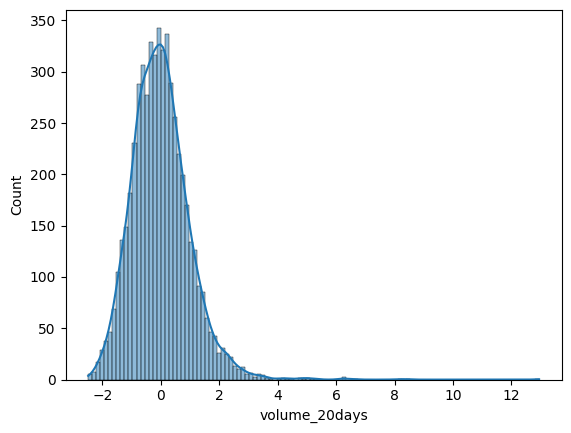

In [250]:
sns.histplot(test['volume_20days'], kde=True)

### FOLDS

In [77]:
fold_length = 252 #1 an
fold_stride = 60 #1 trimestre

In [251]:
folds_test = get_folds(test, fold_length, fold_stride)

In [252]:
folds_test = folds_test[1]

In [253]:
folds_test

,volume,dividend_amount,split_coefficient,reportedEPS,surprisePercentage,10Y_yield,2Y_yield,10_2_spread,oil_price,orders,fed_funds,unemployment_rate,inf_exp,non_farm_payroll,CPI,retail_sales,gdp_per_capita,gold_price,usd_price,return,high/low,volatility_5days,volatility_10days,volatility_20days,momentum_5days,momentum_10days,momentum_20days,distance_5days,distance_10days,distance_20days,volume_5days,volume_10days,volume_20days,volume_momentum_5days,volume_momentum_10days,volume_momentum_20days,price/eps,momentum_5days/eps,momentum_10days/eps,momentum_20days/eps,gold_return,10Y_return,2Y_return,spread_return,oil_return,usd_return,unemployement_return,cpi_return,non_farm_payroll_return,gdp_return
60,-0.907754,0.0,0.0,-0.520563,0.0,1.815246,1.851192,-0.577047,-1.365162,-1.109940,2.341591,-0.434783,0.166667,-0.372520,-1.157703,-0.930548,-1.074003,-1.623383,2.370717,-0.043711,2.504654,1.390193,2.223102,2.433076,1.381883,-0.152540,1.216896,0.664370,1.299521,0.950000,0.180336,0.629591,1.367242,-0.934614,-0.919944,-0.876576,-1.034180,-0.496821,-0.063924,-0.536806,1.111833,0.839389,0.578407,-0.121821,0.040901,1.118750,0.0,0.257408,-0.078999,-0.927652
61,-0.669180,0.0,0.0,-0.520563,0.0,1.757585,1.796455,-0.565550,-1.400761,-1.109940,2.229461,-0.434783,0.166667,-0.372520,-1.157703,-0.930548,-1.074003,-1.628149,2.396675,-0.048507,2.951707,2.008878,2.390024,2.579241,0.762514,-0.489142,0.808909,-2.590241,-1.933475,-2.219975,0.267719,0.695483,1.488856,-0.939661,-0.927448,-0.882765,-1.016139,-0.311877,0.034995,-0.409100,-0.874803,-0.539618,-0.384442,0.058242,-0.605031,0.486041,0.0,0.257408,-0.078999,-0.927652
62,-0.421259,0.0,0.0,-0.483568,0.0,1.699924,1.693823,-0.473570,-1.403082,-1.109940,2.030120,-0.434783,0.166667,-0.372520,-1.157703,-0.930548,-1.074003,-1.627652,2.366081,0.117157,6.185921,2.593196,2.577283,2.617154,-0.179567,-0.875811,-0.170702,-2.372619,-2.031668,-2.218872,-1.561741,-1.418738,-1.036291,-0.886397,-0.905005,-0.871757,-0.278768,-0.050284,-0.238856,-0.026941,0.051131,-0.546731,-0.711825,0.479318,-0.039570,-0.574211,0.0,0.257408,-0.078999,-0.927652
63,0.039713,0.0,0.0,-0.483568,0.0,1.807009,1.714350,-0.358596,-1.399600,-1.109940,1.905531,-0.434783,0.166667,-0.372520,-1.157703,-0.930548,-1.074003,-1.619213,2.263176,0.128565,3.433239,3.961000,3.390815,3.200521,0.722637,1.720708,1.449545,5.350638,4.807150,4.907594,-1.928345,-1.889394,-1.685050,-0.804525,-0.857276,-0.851640,-0.229465,0.211034,0.501303,0.465008,1.458973,0.999724,0.118059,0.545059,0.062678,-1.933919,0.0,0.257408,-0.078999,-0.927652
64,-0.664286,0.0,0.0,-0.483568,0.0,1.823483,1.693823,-0.301108,-1.435199,-1.109940,1.849466,-0.434783,0.166667,-0.372520,-1.157703,-0.930548,-1.074003,-1.620901,2.198281,-0.026439,0.787062,5.311561,4.079131,3.876676,3.573767,4.106838,2.533896,4.538980,4.570802,5.182002,-2.055787,-2.236214,-2.099150,-0.608636,-0.779819,-0.801408,-0.240907,1.036843,1.181489,0.794245,-0.331340,0.141322,-0.165643,0.243187,-0.624358,-1.231811,0.0,0.257408,-0.078999,-0.927652
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307,-0.853963,0.0,0.0,-0.498592,0.0,1.757585,1.078032,0.641681,-1.457254,-1.037559,0.161293,0.217391,-0.333333,-0.518211,-1.090239,-0.855211,-1.037967,-1.546038,2.380915,-0.016922,-0.256054,0.131298,-0.213271,0.057187,0.320408,0.107521,-0.052084,-1.544993,-1.342076,-1.264671,-0.197207,-0.725304,-0.997661,-0.890046,-0.954382,-1.004913,1.439429,0.634962,0.399515,0.301886,-0.430579,-0.162923,-0.143896,-0.002783,0.419775,-0.174985,0.0,0.536311,0.060453,-0.675370
308,-0.917177,0.0,0.0,-0.498592,0.0,1.741110,1.084874,0.607189,-1.463058,-1.037559,0.198670,0.217391,-0.333333,-0.518211,-1.090239,-0.855211,-1.037967,-1.544946,2.393894,-0.018014,0.089389,0.281764,-0.134442,0.002701,-0.190050,-0.044160,0.040993,-0.812219,-0.835662,-0.838544,0.136353,-0.478645,-0.945912,-0.883027,-0.948055,-1.012969,

### Split

In [81]:
train_test_ratio = 0.7
input_length = 10
horizon = 1

In [175]:
fold_train, fold_test = train_test_split(folds_test, train_test_ratio, input_length, horizon)

In [176]:
fold_train

,volume,dividend_amount,split_coefficient,reportedEPS,surprisePercentage,10Y_yield,2Y_yield,10_2_spread,oil_price,orders,...,gold_return,10Y_return,2Y_return,spread_return,oil_return,usd_return,unemployement_return,cpi_return,non_farm_payroll_return,gdp_return
60,-0.907754,0.0,0.0,-0.520563,0.0,1.815246,1.851192,-0.577047,-1.365162,-1.109940,...,1.111833,0.839389,0.578407,-0.121821,0.040901,1.118750,0.0,0.257408,-0.078999,-0.927652
61,-0.669180,0.0,0.0,-0.520563,0.0,1.757585,1.796455,-0.565550,-1.400761,-1.109940,...,-0.874803,-0.539618,-0.384442,0.058242,-0.605031,0.486041,0.0,0.257408,-0.078999,-0.927652
62,-0.421259,0.0,0.0,-0.483568,0.0,1.699924,1.693823,-0.473570,-1.403082,-1.109940,...,0.051131,-0.546731,-0.711825,0.479318,-0.039570,-0.574211,0.0,0.257408,-0.078999,-0.927652
63,0.039713,0.0,0.0,-0.483568,0.0,1.807009,1.714350,-0.358596,-1.399600,-1.109940,...,1.458973,0.999724,0.118059,0.545059,0.062678,-1.933919,0.0,0.257408,-0.078999,-0.927652
64,-0.664286,0.0,0.0,-0.483568,0.0,1.823483,1.693823,-0.301108,-1.435199,-1.109940,...,-0.331340,0.141322,-0.165643,0.243187,-0.624358,-1.231811,0.0,0.257408,-0.078999,-0.927652
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
231,-0.899464,0.0,0.0,-0.495962,0.0,1.708161,0.941189,0.802646,-1.689806,-1.038305,...,-0.202894,0.145458,-0.214386,0.121470,-0.584453,-0.534399,0.0,-1.105818,-0.651034,-1.464643
232,-0.995700,0.0,0.0,-0.495962,0.0,1.642263,0.879610,0.814143,-1.707605,-1.038305,...,0.761029,-0.630519,-0.599992,0.021443,-0.426434,-0.880686,0.0,-1.105818,-0.651034,-1.464643
233,-0.762052,0.0,0.0,-0.495962,0.0,1.749348,0.982242,0.791148,-1.662333,-1.436121,...,-0.069912,1.013668,0.963342,-0.050993,1.114221,-1.663871,0.0,-0.717646,-2.742891,-1.055014
234,-0.712837,0.0,0.0,-0.495962,0.0,1.716398,0.961716,0.779651,-1.680906,-1.436121,...,-0.168847,-0.317388,-0.212615,-0.027132,-0.430034,0.557534,0.0,-0.717646,-2.742891,-1.055014


In [84]:
fold_test

,open,volume,dividend_amount,split_coefficient,reportedEPS,surprisePercentage,10Y_yield,2Y_yield,10_2_spread,oil_price,...,gold_return,10Y_return,2Y_return,spread_return,oil_return,usd_return,unemployement_return,cpi_return,non_farm_payroll_return,gdp_return
226,20.58,5177800.0,0.0,1.0,0.0034,0.0,0.0508,0.0311,0.0197,19.37,...,-0.015709,-0.015504,-0.006390,-0.029557,-0.000516,0.002866,0.0,-0.003946,-0.002891,-0.008060
227,21.40,3944000.0,0.0,1.0,0.0034,0.0,0.0508,0.0315,0.0193,18.67,...,0.000725,0.000000,0.012862,-0.020305,-0.036138,0.000952,0.0,-0.003946,-0.002891,-0.008060
228,21.01,4577400.0,0.0,1.0,0.0034,0.0,0.0512,0.0317,0.0195,19.30,...,0.007249,0.007874,0.006349,0.010363,0.033744,0.012025,0.0,-0.003946,-0.002891,-0.008060
229,21.35,2614300.0,0.0,1.0,0.0034,0.0,0.0522,0.0326,0.0196,21.32,...,0.003958,0.019531,0.028391,0.005128,0.104663,0.007437,0.0,-0.003946,-0.002891,-0.008060
230,21.58,3419800.0,0.0,1.0,0.0034,0.0,0.0513,0.0319,0.0194,21.07,...,-0.007885,-0.017241,-0.021472,-0.010204,-0.011726,-0.002376,0.0,-0.003946,-0.002891,-0.008060
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307,25.49,6703700.0,0.0,1.0,0.0020,0.0,0.0521,0.0336,0.0185,26.43,...,-0.004285,-0.003824,-0.005917,0.000000,0.022042,-0.000859,0.0,0.005593,0.004532,0.003598
308,24.84,4811200.0,0.0,1.0,0.0020,0.0,0.0519,0.0337,0.0182,26.28,...,0.001821,-0.003839,0.002976,-0.016216,-0.005675,0.001204,0.0,0.005593,0.004532,0.003598
309,24.54,4169100.0,0.0,1.0,0.0020,0.0,0.0518,0.0339,0.0179,26.28,...,0.002478,-0.001927,0.005935,-0.016484,0.000000,0.001202,0.0,0.005593,0.004532,0.003598
310,24.30,2508000.0,0.0,1.0,0.0020,0.0,0.0511,0.0328,0.0183,26.28,...,0.001318,-0.013514,-0.032448,0.022346,0.000000,-0.003603,0.0,0.005593,0.004532,0.003598


### Sequences

In [85]:
output_length = 1
stride = 1

In [86]:
X_train, y_train = get_X_y(fold=fold_train,
                           horizon=horizon,
                           input_length=input_length,
                           output_length=output_length,
                           stride=stride)
X_test, y_test = get_X_y(fold=fold_test,
                         horizon=horizon,
                         input_length=input_length,
                         output_length=output_length,
                         stride=stride)

In [87]:
print("Shapes for the training set:")
print(f"X_train.shape = {X_train.shape}, y_train.shape = {y_train.shape}")

print("Shapes for the test set:")
print(f"X_test.shape = {X_test.shape}, y_test.shape = {y_test.shape}")

Shapes for the training set:
X_train.shape = (176, 10, 51), y_train.shape = (176,)
Shapes for the test set:
X_test.shape = (86, 10, 51), y_test.shape = (86,)


In [93]:
len(X_train)

176

In [89]:
y_train

array([ 0.03987408,  0.02795699, -0.0081591 ,  0.07771788,  0.02376238,
        0.00856898, -0.01548318,  0.00318878, -0.02401302,  0.04577241,
       -0.0235    ,  0.02011494, -0.00652174,  0.03041307,  0.06622517,
        0.04038138, -0.01569714,  0.03165064,  0.06392694,  0.02621919,
       -0.0787309 ,  0.00127497, -0.04474394, -0.04178929, -0.0053816 ,
       -0.015625  ,  0.01521984, -0.00107585,  0.07330362, -0.02467866,
       -0.01614531,  0.0446527 , -0.01101005, -0.0015748 , -0.00254669,
       -0.03992304, -0.01002865, -0.01939954,  0.01128004,  0.00368034,
       -0.05570434, -0.03097826, -0.04124579,  0.01618304, -0.02282158,
       -0.17171315, -0.0439408 ,  0.02545314,  0.06071429,  0.02816901,
       -0.00084926,  0.01891368,  0.00193424,  0.08180943, -0.01266376,
        0.        , -0.01896552, -0.03153153,  0.        , -0.05531915,
        0.01596517,  0.03934426,  0.00475059,  0.01201717, -0.02904762,
       -0.02238095, -0.01726316,  0.        ,  0.05125   , -0.00

# Cross Val DL

In [61]:
fold_length = 252 #1 an
fold_stride = 60 #1 trimestre
train_test_ratio = 0.7
input_length = 10
horizon = 1
output_length = 1
stride = 1

In [102]:
import tensorflow as tf

from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers, metrics
from tensorflow.keras.layers.experimental.preprocessing import Normalization
from tensorflow.keras.optimizers.schedules import ExponentialDecay
from tensorflow.keras import regularizers
from tensorflow.keras.metrics import RootMeanSquaredError


def init_model(X_train, y_train):

    # 0 - Normalization
    # ======================    
    normalizer = Normalization()
    normalizer.adapt(X_train)
    
    # 1 - RNN architecture
    # ======================    
    model = models.Sequential()    
    # Normalizing Inputs
    model.add(normalizer)
    # Recurrent Layer
    model.add(layers.LSTM(units=64, activation='tanh', return_sequences=False, 
                          recurrent_dropout=0.5, dropout=0.5))
    # Hidden Dense Layer that we are regularizing
    reg_l2 = regularizers.L2(0.5)
    model.add(layers.Dense(32, activation="relu", kernel_regularizer = reg_l2))
    model.add(layers.Dropout(rate=0.5))
    
    # Predictive Dense Layer
    ### model.add(layers.Dense(1, activation='linear'))
    ### QUESTION: HOW DO YOU CHANGE THIS PART FOR MULTIPLE STEPS ?    
    # $CHALLENGIFY_BEGIN    
    output_length = 1 #y_train.shape[1]
    model.add(layers.Dense(output_length, activation='linear'))
    # $CHALLENGIFY_END
    
    # 2 - Compiler
    # ======================
    initial_learning_rate = 0.01
    rmse = RootMeanSquaredError()

    lr_schedule = ExponentialDecay(initial_learning_rate, decay_steps=1000, decay_rate=0.5)

    adam = optimizers.Adam(learning_rate=lr_schedule)
    model.compile(loss='mse', optimizer='adam', metrics=[rmse])

    return model


In [103]:
from tensorflow.keras.callbacks import EarlyStopping


def fit_model(model: tf.keras.Model, verbose=1):

    es = EarlyStopping(monitor="val_loss",
                       patience=10,
                       mode="min",
                       restore_best_weights=True)

    history = model.fit(X_train,
                        y_train,
                        validation_split=0.3,
                        shuffle=False,
                        batch_size=32,
                        epochs=200,
                        callbacks=[es],
                        verbose=verbose)

    return model, history

In [112]:
def plot_history(history):
    
    fig, ax = plt.subplots(1,2, figsize=(20,7))
    # --- LOSS: MSE --- 
    ax[0].plot(history.history['loss'])
    ax[0].plot(history.history['val_loss'])
    ax[0].set_title('MSE')
    ax[0].set_ylabel('Loss')
    ax[0].set_xlabel('Epoch')
    ax[0].legend(['Train', 'Validation'], loc='best')
    ax[0].grid(axis="x",linewidth=0.5)
    ax[0].grid(axis="y",linewidth=0.5)
    
    # --- METRICS:MAE ---
    
    ax[1].plot(history.history['root_mean_squared_error'])
    ax[1].plot(history.history['val_loss'])
    ax[1].set_title('RMSE')
    ax[1].set_ylabel('RMSE')
    ax[1].set_xlabel('Epoch')
    ax[1].legend(['Train', 'Validation'], loc='best')
    ax[1].grid(axis="x",linewidth=0.5)
    ax[1].grid(axis="y",linewidth=0.5)
                        
    return ax

In [114]:
list_of_mae_baseline_model = []
list_of_mae_recurrent_model = []
    
# 1 - Creating FOLDS
# =======================================================
    
folds = get_folds(test, fold_length, fold_stride)
    
for fold_id, fold in enumerate(folds):

    # 2 - CHRONOLOGICAL TRAIN TEST SPLIT of the current FOLD

    (fold_train, fold_test) = train_test_split(fold = fold,
                                            train_test_ratio = train_test_ratio,
                                            input_length = input_length,
                                            horizon = horizon)
    
    # 3 - Scanninng fold_train and fold_test for SEQUENCES 
    # =======================================================       
    
    X_train, y_train = get_X_y(fold = fold_train, 
                               horizon = horizon, 
                               input_length = input_length, 
                               output_length = output_length, 
                               stride = stride)
    
    X_test, y_test = get_X_y(fold_test, 
                             horizon = horizon, 
                             input_length = input_length, 
                             output_length = output_length,
                             stride = stride)
    
    # 4.1 - Baseline Model
    # =======================================================
#     mae_baseline = last_seen_value_baseline(X_test, y_test)
#     list_of_mae_baseline_model.append(mae_baseline)
    
#     print("-"*50)
#     print(f"MAE baseline fold n°{fold_id} = {round(mae_baseline, 2)}")        
    
    
    # 4.2 - LSTM Model
    # =======================================================
    
    # Initializing the LSTM Model
    model = init_model(X_train, y_train)
    # Training
    model, history = fit_model(model, verbose=0)
    # Evaluation
    res = model.evaluate(X_test, y_test, verbose = 0)
    mae_lstm = res[1]
    
    list_of_mae_recurrent_model.append(mae_lstm)
    
    print(f"RMSE LSTM fold n°{fold_id} = {round(mae_lstm, 2)}")
    
#    # 4.3 - Comparison LSTM vs Baseline for the current fold
#    # =======================================================
#    print(f"🏋🏽‍♂️ Improvement/Decrease vs. Baseline: {round((1 - (mae_lstm/mae_baseline))*100,2)} % \n")      

RMSE LSTM fold n°0 = 0.03
RMSE LSTM fold n°1 = 0.03
RMSE LSTM fold n°2 = 0.04
RMSE LSTM fold n°3 = 0.03


KeyboardInterrupt: 

Model: "sequential_45"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_45 (Normaliza  (None, None, 50)         101       
 tion)                                                           
                                                                 
 lstm_45 (LSTM)              (None, 64)                29440     
                                                                 
 dense_85 (Dense)            (None, 32)                2080      
                                                                 
 dropout_43 (Dropout)        (None, 32)                0         
                                                                 
 dense_86 (Dense)            (None, 1)                 33        
                                                                 
Total params: 31,654
Trainable params: 31,553
Non-trainable params: 101
_______________________________________________

[0.030390074476599693, 0.02304627187550068]

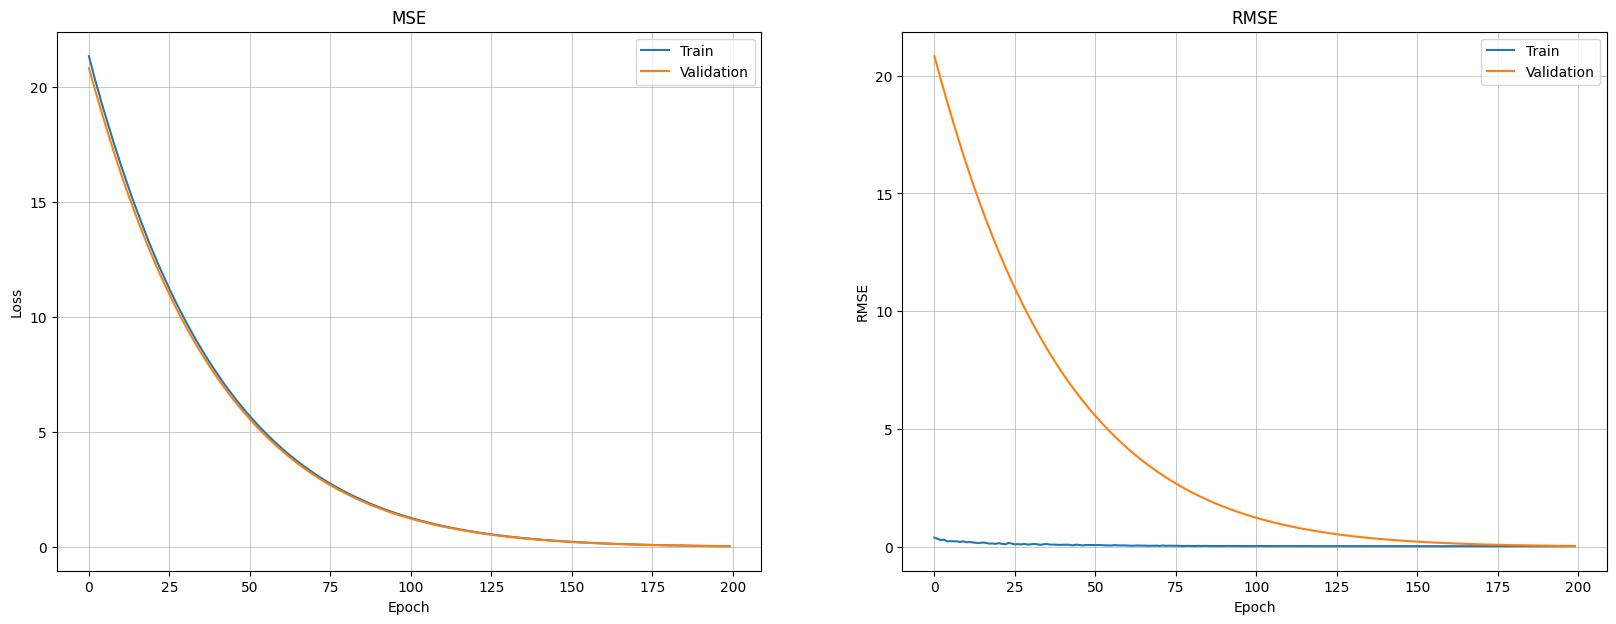

In [115]:
%%time
# 1 - Initialising the RNN model
# ==================================== #
model = init_model(X_train, y_train)
model.summary()

# 2 - Training
# ====================================
model, history = fit_model(model, verbose=0)
plot_history(history);

# 3 - Evaluation
# ====================================
res = model.evaluate(X_test, y_test)
#print("-"*50)
#print(f"The LSTM MAE on the test set is equal to {round(res[1],2)} Celsius degrees")
res

# Cross Val ML

## Variables

In [3]:
fold_length = 252 #1 an
fold_stride = 60 #1 trimestre
train_test_ratio = 0.7
input_length = 10
horizon = 1
output_length = 1
stride = 1

## Façon TimeserieSplit

In [4]:
from sklearn.model_selection import TimeSeriesSplit

from sklearn.linear_model import LinearRegression, SGDRegressor, HuberRegressor
from sklearn.linear_model import Lars, Lasso, RANSACRegressor, Ridge, TheilSenRegressor
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor, AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor, VotingRegressor, StackingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

folds = TimeSeriesSplit(n_splits=91)

score_gradboostr = []

X = test[['volume', 'volatility_5days' , 'momentum_5days', 'distance_5days','return']]
y = test['return']

for train_index, test_index in folds.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    model_gradboostr = GradientBoostingRegressor().fit(X_train, y_train)
    score_gradboostr.append(model_gradboostr.score(X_test, y_test))

score_gradboostr = np.mean(score_gradboostr)
score_gradboostr

NameError: name 'GradientBoostingRegressor' is not defined

## Façon RNN

In [ ]:
from sklearn.linear_model import LinearRegression, SGDRegressor, HuberRegressor
from sklearn.linear_model import Lars, Lasso, RANSACRegressor, Ridge, TheilSenRegressor
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor, AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor, VotingRegressor, StackingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor

def cross_validate_model() :
    '''
    get_folds() create many FOLDS, train_test_split() create a split on ONE FOLDS.
    The goal of this function is to make splits and sequences on each FOLDS.
    Then, apply a model.
    '''
    folds = get_folds(test, fold_length, fold_stride) # 1 - Creating FOLDS
    
    liste_score = []
    
#     score_lr = [] 
#     score_knn = [] 
#     score_lin_reg_sgd = [] 
#     score_huberr = [] 
#     score_lars = [] 
#     score_lasso = [] 
#     score_ransacr = [] 
#     score_ridge = [] 
#     score_theilsenr = [] 
#     score_svr = []
#     score_elasticnet = []
    score_forestreg = []
    score_baggingr = []
#     score_daboostr = []
#    score_gradboostr = []
    score_XGBR = []
#    score_Votingr = []
#     score_stackingr = []

    for fold_id, fold in enumerate(folds):

        # 2 - CHRONOLOGICAL TRAIN TEST SPLIT of the current FOLD

        (fold_train, fold_test) = train_test_split(fold = fold,
                                                train_test_ratio = train_test_ratio,
                                                input_length = input_length,
                                                horizon = horizon)

        # 3 - Scanninng fold_train and fold_test for SEQUENCES

        X_train, y_train = fold_train, fold_train['return']

        X_test, y_test = fold_test, fold_test['return']
        
        # 4 - fit model

#        model_lr = LinearRegression().fit(X_train, y_train)
#         score_lr.append(model_lr.score(X_test, y_test))

#         model_knn = KNeighborsRegressor(n_neighbors=20).fit(X_train, y_train)
#         score_knn.append(model_knn.score(X_test, y_test))

#         model_lin_reg_sgd = SGDRegressor(loss='squared_error').fit(X_train, y_train)
#         score_lin_reg_sgd.append(model_lin_reg_sgd.score(X_test, y_test))

#         model_huberr = HuberRegressor().fit(X_train, y_train)
#         score_huberr.append(model_huberr.score(X_test, y_test))

#         model_lars = Lars().fit(X_train, y_train)
#         score_lars.append(model_lars.score(X_test, y_test))

#         model_lasso = Lasso().fit(X_train, y_train)
#         score_lasso.append(model_lasso.score(X_test, y_test))

#         model_ransacr = RANSACRegressor().fit(X_train, y_train)
#         score_ransacr.append(model_ransacr.score(X_test, y_test))

#         model_ridge = Ridge().fit(X_train, y_train)
#         score_ridge.append(model_ridge.score(X_test, y_test))

##        model_theilsenr = TheilSenRegressor().fit(X_train, y_train)
##        score_theilsenr.append(model_theilsenr.score(X_test, y_test))

#         model_svr = SVR().fit(X_train, y_train)
#         score_svr.append(model_svr.score(X_test, y_test))

#         model_elasticnet = ElasticNet().fit(X_train, y_train)
#         score_elasticnet.append(model_elasticnet.score(X_test, y_test))

        model_forestreg = RandomForestRegressor(n_estimators=500, max_features='auto').fit(X_train, y_train)
        score_forestreg.append(model_forestreg.score(X_test, y_test))

        model_baggingr = BaggingRegressor().fit(X_train, y_train)
        score_baggingr.append(model_baggingr.score(X_test, y_test))

#         model_daboostr = AdaBoostRegressor().fit(X_train, y_train)
#         score_daboostr.append(model_daboostr.score(X_test, y_test))

#         model_gradboostr = GradientBoostingRegressor().fit(X_train, y_train)
#         score_gradboostr.append(model_gradboostr.score(X_test, y_test))

        model_XGBR = XGBRegressor().fit(X_train, y_train)
        score_XGBR.append(model_XGBR.score(X_test, y_test))

# #       model_Votingr = VotingRegressor().fit(X_train, y_train)
#        score_Votingr.append(model_Votingr.score(X_test, y_test))

#  #      model_stackingr = StackingRegressor().fit(X_train, y_train)
#        score_stackingr.append(model_stackingr.score(X_test, y_test))

    liste_score = {
#     'score_lr': np.mean(score_lr), #Possible faire un DF et utiliser mean de pandas
#     'score_knn': np.mean(score_knn),
#     'score_lin_reg_sgd': np.mean(score_lin_reg_sgd), #alt + shift pour sélectionner
#     'score_huberr': np.mean(score_huberr),
#     'score_lars': np.mean(score_lars),
#     'score_lasso': np.mean(score_lasso),
#     'score_ransacr': np.mean(score_ransacr), 
#     'score_ridge':np.mean(score_ridge),
# #    'score_theilsenr': np.mean(score_theilsenr),
#     'score_svr': np.mean(score_svr),
#     'score_elasticnet': np.mean(score_elasticnet),
    'score_forestreg': np.mean(score_forestreg),
    'score_baggingr': np.mean(score_baggingr),
#    'score_daboostr': np.mean(score_daboostr),
#    'score_gradboostr': np.mean(score_gradboostr),
    'score_XGBR': np.mean(score_XGBR),
#    'score_Votingr': p.mean(score_Votingr),
#    'score_stackingr': p.mean(score_stackingr),
    }

    return liste_score

In [119]:
#score = cross_validate_model()
score

/Users/rogersiv/.pyenv/versions/3.10.6/envs/dynamic_portfolio/lib/python3.10/site-packages/sklearn/linear_model/_huber.py:335: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/rogersiv/.pyenv/versions/3.10.6/envs/dynamic_portfolio/lib/python3.10/site-packages/sklearn/linear_model/_base.py:133: FutureWarning: The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lars())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter 

/Users/rogersiv/.pyenv/versions/3.10.6/envs/dynamic_portfolio/lib/python3.10/site-packages/sklearn/linear_model/_huber.py:335: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/rogersiv/.pyenv/versions/3.10.6/envs/dynamic_portfolio/lib/python3.10/site-packages/sklearn/linear_model/_base.py:133: FutureWarning: The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lars())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter 

/Users/rogersiv/.pyenv/versions/3.10.6/envs/dynamic_portfolio/lib/python3.10/site-packages/sklearn/linear_model/_huber.py:335: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/rogersiv/.pyenv/versions/3.10.6/envs/dynamic_portfolio/lib/python3.10/site-packages/sklearn/linear_model/_base.py:133: FutureWarning: The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lars())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter 

/Users/rogersiv/.pyenv/versions/3.10.6/envs/dynamic_portfolio/lib/python3.10/site-packages/sklearn/linear_model/_huber.py:335: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/rogersiv/.pyenv/versions/3.10.6/envs/dynamic_portfolio/lib/python3.10/site-packages/sklearn/linear_model/_base.py:133: FutureWarning: The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lars())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter 

/Users/rogersiv/.pyenv/versions/3.10.6/envs/dynamic_portfolio/lib/python3.10/site-packages/sklearn/linear_model/_huber.py:335: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/rogersiv/.pyenv/versions/3.10.6/envs/dynamic_portfolio/lib/python3.10/site-packages/sklearn/linear_model/_base.py:133: FutureWarning: The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lars())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter 

/Users/rogersiv/.pyenv/versions/3.10.6/envs/dynamic_portfolio/lib/python3.10/site-packages/sklearn/linear_model/_huber.py:335: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/rogersiv/.pyenv/versions/3.10.6/envs/dynamic_portfolio/lib/python3.10/site-packages/sklearn/linear_model/_base.py:133: FutureWarning: The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lars())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter 

/Users/rogersiv/.pyenv/versions/3.10.6/envs/dynamic_portfolio/lib/python3.10/site-packages/sklearn/linear_model/_huber.py:335: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/rogersiv/.pyenv/versions/3.10.6/envs/dynamic_portfolio/lib/python3.10/site-packages/sklearn/linear_model/_base.py:133: FutureWarning: The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lars())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter 

/Users/rogersiv/.pyenv/versions/3.10.6/envs/dynamic_portfolio/lib/python3.10/site-packages/sklearn/linear_model/_huber.py:335: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/rogersiv/.pyenv/versions/3.10.6/envs/dynamic_portfolio/lib/python3.10/site-packages/sklearn/linear_model/_base.py:133: FutureWarning: The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lars())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter 

/Users/rogersiv/.pyenv/versions/3.10.6/envs/dynamic_portfolio/lib/python3.10/site-packages/sklearn/linear_model/_huber.py:335: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/rogersiv/.pyenv/versions/3.10.6/envs/dynamic_portfolio/lib/python3.10/site-packages/sklearn/linear_model/_base.py:133: FutureWarning: The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lars())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter 

/Users/rogersiv/.pyenv/versions/3.10.6/envs/dynamic_portfolio/lib/python3.10/site-packages/sklearn/linear_model/_huber.py:335: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/rogersiv/.pyenv/versions/3.10.6/envs/dynamic_portfolio/lib/python3.10/site-packages/sklearn/linear_model/_base.py:133: FutureWarning: The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lars())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter 

/Users/rogersiv/.pyenv/versions/3.10.6/envs/dynamic_portfolio/lib/python3.10/site-packages/sklearn/linear_model/_huber.py:335: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/rogersiv/.pyenv/versions/3.10.6/envs/dynamic_portfolio/lib/python3.10/site-packages/sklearn/linear_model/_base.py:133: FutureWarning: The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lars())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter 

{'score_lr': 0.9999999293665786,
 'score_knn': -0.0015272315772421486,
 'score_lin_reg_sgd': -0.06146278611033261,
 'score_huberr': -7.368667962325332,
 'score_lars': 1.0,
 'score_lasso': -0.017300736292231934,
 'score_ransacr': 0.9999990410182286,
 'score_ridge': -0.9353362556996139,
 'score_svr': -0.693536424701204,
 'score_elasticnet': -0.017300736292231934,
 'score_forestreg': 0.9579864514023017,
 'score_baggingr': 0.953116375753503,
 'score_daboostr': 0.9634568566659962,
 'score_gradboostr': 0.9734139844475018,
 'score_XGBR': 0.8526980543693353}

In [124]:
score_opt = cross_validate_model()
score_opt

/Users/rogersiv/.pyenv/versions/3.10.6/envs/dynamic_portfolio/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/rogersiv/.pyenv/versions/3.10.6/envs/dynamic_portfolio/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/rogersiv/.pyenv/versions/3.10.6/envs/dynamic_portfolio/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed 

/Users/rogersiv/.pyenv/versions/3.10.6/envs/dynamic_portfolio/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/rogersiv/.pyenv/versions/3.10.6/envs/dynamic_portfolio/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/rogersiv/.pyenv/versions/3.10.6/envs/dynamic_portfolio/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed 

/Users/rogersiv/.pyenv/versions/3.10.6/envs/dynamic_portfolio/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/rogersiv/.pyenv/versions/3.10.6/envs/dynamic_portfolio/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/rogersiv/.pyenv/versions/3.10.6/envs/dynamic_portfolio/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed 

/Users/rogersiv/.pyenv/versions/3.10.6/envs/dynamic_portfolio/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/rogersiv/.pyenv/versions/3.10.6/envs/dynamic_portfolio/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/rogersiv/.pyenv/versions/3.10.6/envs/dynamic_portfolio/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed 

/Users/rogersiv/.pyenv/versions/3.10.6/envs/dynamic_portfolio/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/rogersiv/.pyenv/versions/3.10.6/envs/dynamic_portfolio/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/rogersiv/.pyenv/versions/3.10.6/envs/dynamic_portfolio/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed 

{'score_forestreg': 0.9605514185844324,
 'score_baggingr': 0.9585317965517772,
 'score_XGBR': 0.8526980543693353}